In [46]:
import pandas as pd
from django.contrib.admin import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
from scipy.stats import ttest_ind
import plotly.express as px

sales = pd.read_excel('./data/coffee_shop_sales.xlsx')
sales['transaction_total'] = sales['unit_price'] * sales['transaction_qty']
main_sales = sales.groupby('transaction_date')['transaction_total'].sum()

# Create the main graph
px.scatter(main_sales, title='Daily Sales')

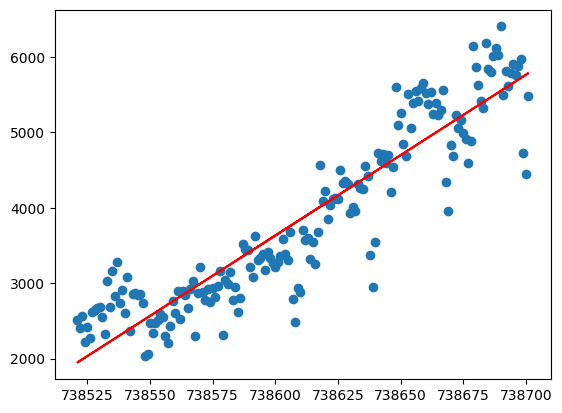

In [55]:
sales_df = main_sales.to_frame().reset_index()

sales_df['transaction_date_ordinal'] = sales_df['transaction_date'].apply(lambda x: x.toordinal())

X = sales_df[['transaction_date_ordinal']]
y = sales_df['transaction_total']

# Split the data
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lin = LinearRegression().fit(X_train_lin, y_train_lin)
y_train_lin = lin.predict(X_train_lin)
y_test_lin = lin.predict(X_test_lin)
plt.plot(X_train_lin, y_train_lin, color='red')
plt.scatter(sales_df['transaction_date_ordinal'], sales_df['transaction_total'])

# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_lin)
# X_test_poly = poly.transform(X_test_lin)
